# Groupe 3 : Projet Machine Learning

## Introduction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

In [6]:
dataset = pd.read_csv('scitweets_export.tsv', sep='\t')
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


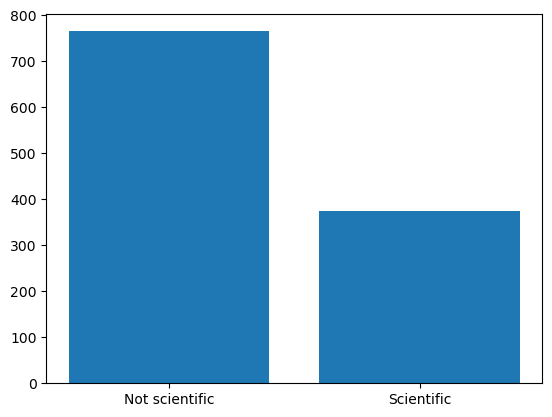

In [7]:
not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

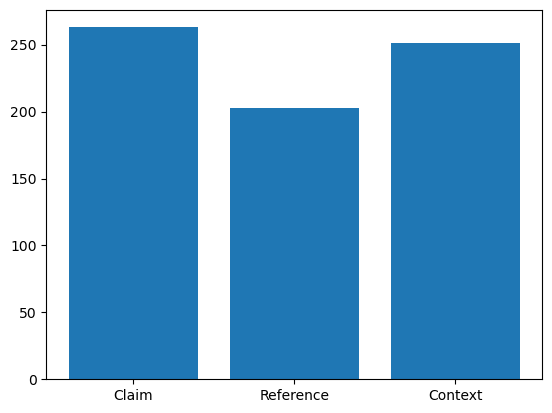

In [8]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

## Prétraitement

On met tout en minuscule

In [9]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",can any gynecologist with cancer experience ex...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",does daily routine help prevent problems with ...,1,1.0,0.0,0.0


### Lemmatization

download the packages

In [10]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tiziri-tamani/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/tiziri-
[nltk_data]     tamani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove the stopwords but not the negation words or the words that are important for the sentiment analysis

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
work_to_keep = ['no', 'not', 'nor', 'too', 'very', 'against', 'but', 'don', 'don\'t', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

for word in work_to_keep:
    stop_words.remove(word)

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the links

In [12]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        if 'http' in word or 'www' in word:
            continue
        new_text.append(word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Transform the emojis into text

In [13]:
import emoji

# Parcourir les indices et modifier directement les valeurs dans le DataFrame
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = emoji.demojize(line['text'])

# Afficher les premières lignes du DataFrame pour vérifier les modifications
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym :basketball::fle...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the non-alphabetic characters except the #

In [14]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        new_word = ""
        for l in word:
            if l.isalpha() or l in ['#', "'", '?', '!'] :
                new_word += l
            else:
                new_word += ' '
        new_text.append(new_word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym basketball fle...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch lock highs lead sleeping couch gotta st...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove multiple spaces

In [15]:
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = ' '.join(line['text'].split())

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,"3,16669998137483E+017",knees bit sore guess that's sign recent treadm...,0,0.0,0.0,0.0
1,1,"3,19090866545386E+017",mcdonald's breakfast stop gym basketball flexe...,0,0.0,0.0,0.0
2,2,"3,22030931022066E+017",gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,"3,22694830620807E+017",couch lock highs lead sleeping couch gotta sto...,1,1.0,0.0,0.0
4,4,"3,28524426658329E+017",daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


## Vectorisation des textes

(TF-IDF)

## Lemmatization 

In [16]:
# #lemmatization  avec nltk 
# import nltk
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

# # Télécharger les ressources nécessaires (à faire une seule fois)
# nltk.download('punkt')
# nltk.download('wordnet')

# # Initialiser le lemmatiseur
# lemmatizer = WordNetLemmatizer()

# def lemmatize_text_nltk(text):
#     # Tokeniser le texte
#     tokens = word_tokenize(text, language='english')
#     # Lemmatiser chaque token
#     lemmas = [lemmatizer.lemmatize(token) for token in tokens]
#     # Rejoindre les lemmes en une seule chaîne de caractères
#     return ' '.join(lemmas)

# # Appliquer la lemmatisation
# dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text_nltk)

In [79]:
### import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import contractions
import enchant
from enchant.checker import SpellChecker

# Charger le modèle de langue anglaise de spaCy
nlp = spacy.load('en_core_web_sm')

# Initialiser le correcteur orthographique avec enchant
d = enchant.Dict("en_US")

def correct_spelling(text):
    """Corrige les fautes d'orthographe avec enchant."""
    checker = SpellChecker("en_US")
    checker.set_text(text)
    for error in checker:
        if error.suggest():  # S'il y a des suggestions
            error.replace(error.suggest()[0])  # Remplace par la première suggestion
    return checker.get_text()

def lemmatize_text(text):
    """Pipeline de prétraitement : Correction → Contractions → Lemmatisation."""
    # Étape 1: Correction orthographique
    text = correct_spelling(text)
    
    # Étape 2: Gestion des contractions (ex: "that's" → "that is")
    text = contractions.fix(text)
    
    # Étape 3: Remplacement manuel des 's résiduels (optionnel)
    text = text.replace("'s", " be")
    
    # Étape 4: Lemmatisation avec spaCy
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

# Appliquer la lemmatisation à la colonne 'text'
dataset['text_lemmatized'] = dataset['text'].apply(lemmatize_text)
dataset['text_lemmatized'] = dataset['text_lemmatized'].apply(lambda x: x.lower())
dataset.head()

# Afficher les résultats
print("Avant la lemmatisation :")
print(dataset['text'].head())
print("\nAprès la lemmatisation :")
print(dataset['text_lemmatized'].head())

#from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
work_to_keep = ['no', 'not', 'nor', 'too', 'very', 'against', 'but', 'don', 'don\'t', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

for word in work_to_keep:
    stop_words.remove(word)

dataset['text_lemmatized'] = dataset['text_lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
#dataset.head()
print("après supression des stop wors")
print(dataset['text_lemmatized'].head())

Avant la lemmatisation :
0    knees bit sore guess that's sign recent treadm...
1    mcdonald's breakfast stop gym basketball flexe...
2    gynecologist cancer experience explain dangers...
3    couch lock highs lead sleeping couch gotta sto...
4    daily routine help prevent problems bipolar di...
Name: text, dtype: object

Après la lemmatisation :
0    knee bit sore guess that be sign recent tread ...
1    mcdonald be breakfast stop gym basketball flex...
2    gynecologist cancer experience explain danger ...
3    couch lock high lead sleep couch get to stop shit
4    daily routine help prevent problem bipolar dis...
Name: text_lemmatized, dtype: object
après supression des stop wors
0    knee bit sore guess sign recent tread mill wor...
1    mcdonald breakfast stop gym basketball flexed ...
2    gynecologist cancer experience explain danger ...
3       couch lock high lead sleep couch get stop shit
4    daily routine help prevent problem bipolar dis...
Name: text_lemmatized, dtype: 

In [60]:
#!pip install contractions
#!pip install pyenchant

#!pip install pyenchant --upgrade
#!pip install xgboost



## Vectorisation 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# 1. Division des données
X = dataset['text_lemmatized']
y_binary = dataset['science_related']

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 2. Vectorisation initiale (avec tous les features)
initial_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000000)
X_train_vec = initial_vectorizer.fit_transform(X_train)
X_test_vec = initial_vectorizer.transform(X_test)

# 3. Entraînement RandomForest pour sélection de features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vec, y_train)

# 4. Extraction des 150 features les plus importantes
feature_importances = rf.feature_importances_
feature_names = initial_vectorizer.get_feature_names_out()

# Tri par importance et sélection du top 150
top_indices = np.argsort(feature_importances)[-150:][::-1]
selected_features = feature_names[top_indices]

# 5. Création d'un nouveau vectoriseur avec seulement les features sélectionnées
final_vectorizer = TfidfVectorizer(ngram_range=(1, 2), vocabulary=selected_features)
X_train_final = final_vectorizer.fit_transform(X_train)
X_test_final = final_vectorizer.transform(X_test)

# 6. Ré-entraînement du modèle sur les features sélectionnées
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_final, y_train)

# 7. Visualisation des top features (optionnel)
important_features = sorted(zip(selected_features, feature_importances[top_indices]), 
                          key=lambda x: x[1], reverse=True)

# plt.figure(figsize=(10, 12))
# plt.barh([x[0] for x in important_features[:20]], 
#          [x[1] for x in important_features[:20]], 
#          color='skyblue')
# plt.gca().invert_yaxis()
# plt.xlabel("Importance")
# plt.title("Top 20 mots les plus discriminants")
# plt.tight_layout()
# plt.show()

## visualisation avec tsne 

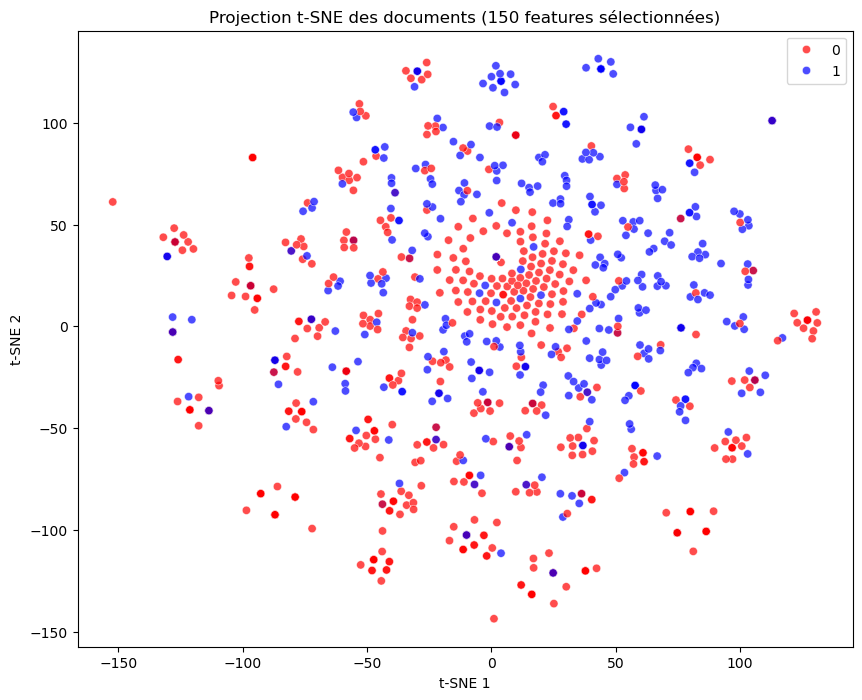

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_combined, 
                palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title('Projection t-SNE des documents (150 features sélectionnées)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

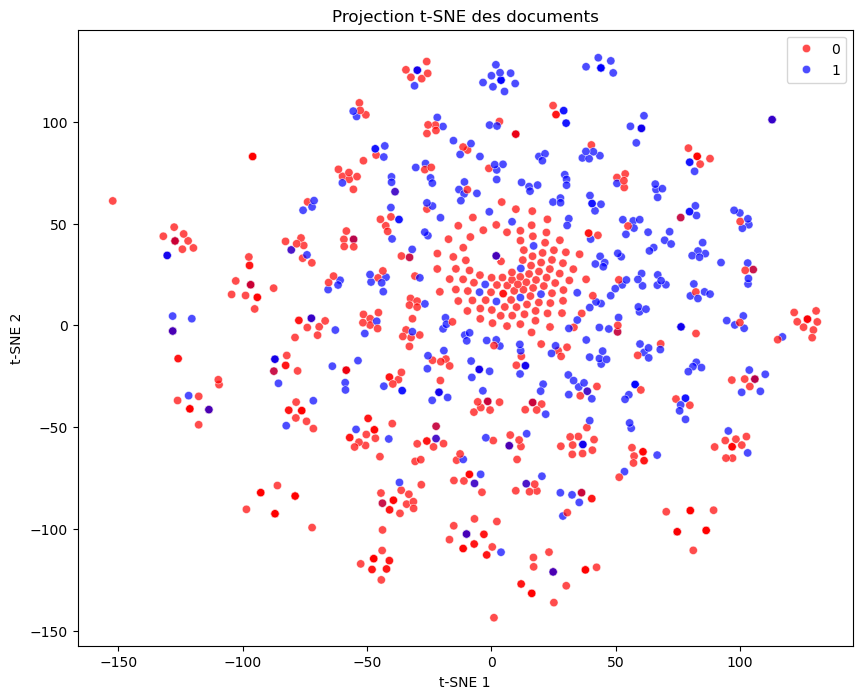

Nombre de points après suppression des outliers : 1083
Logistic Regression: Accuracy = 0.7991 ± 0.0133
Random Forest: Accuracy = 0.8037 ± 0.0149
SVM: Accuracy = 0.8095 ± 0.0228

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       151
           1       0.61      0.45      0.52        66

    accuracy                           0.75       217
   macro avg       0.70      0.66      0.67       217
weighted avg       0.73      0.75      0.73       217



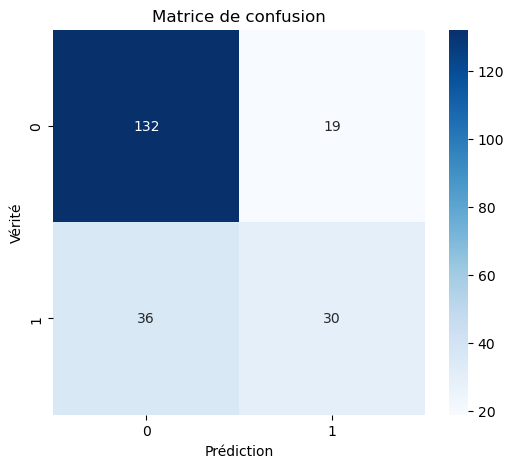

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# === 1. Normalisation des données ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# === 2. Réduction de dimension avec t-SNE ===
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# === 3. Visualisation t-SNE ===
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_combined, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title('Projection t-SNE des documents')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

# === 4. Détection et suppression des outliers ===
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(X_scaled)
mask = outlier_pred != -1  # On garde seulement les points non détectés comme outliers
X_cleaned, y_cleaned = X_scaled[mask], np.array(y_combined)[mask]

print(f"Nombre de points après suppression des outliers : {X_cleaned.shape[0]}")

# === 5. Séparation train/test ===
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

# === 6. Test de plusieurs modèles avec validation croisée ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

# === 7. Sélection du meilleur modèle et évaluation sur le test set ===
best_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Remplace par le meilleur modèle
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# === 8. Affichage des résultats ===
print("\nClassification Report :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.title("Matrice de confusion")
plt.show()